# Basic data exploration - Titanic. 

### based on the part of the homework 1 of the ML course at MCS Department SPbU 

### https://github.com/spbu-math-cs/ml-course


**1.** Describe this dataset: What is the distribution of women/men in it? How many passengers were in each class? What is the average/minimum/maximum age of the passengers? How many passengers survived?

In [3]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

print(data.head())

print(data.columns)

gender_distribution = data['Sex'].value_counts()

print("Gender Distribution (Count):")
print(gender_distribution)


gender_percentage = data['Sex'].value_counts(normalize=True) * 100

print("\nGender Distribution (Percentage):")
print(gender_percentage)

class_counts = data['Pclass'].value_counts()

print("Passenger Class Distribution (Count):")
print(class_counts)

print("Passenger Mean Age: ", np.mean(data['Age']))
print("Passenger Max Age: ", np.max(data['Age']))
print("Passenger Min Age: ", np.min(data['Age']))

survivers_count = data[data['Survived'] == 1].shape[0]

print("Survivers (Count): ", survivers_count)

survivers_percentage = data[data['Survived'] ==1].shape[0]*100 / data.shape[0]

print("Survivers (Percentage): ", survivers_percentage)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
In

**2.** Is it true that women survived more often than men?	
Which passengers survived more often: those with cheaper or more expensive tickets? 
Is it true that younger passengers survived more often than older ones?

Proportion of women survived: 0.7420382165605095
Proportion of men survived: 0.18890814558058924
Proportion of high-ticket price people survived: 0.5180180180180181
Proportion of low-ticket price people survived: 0.2505592841163311


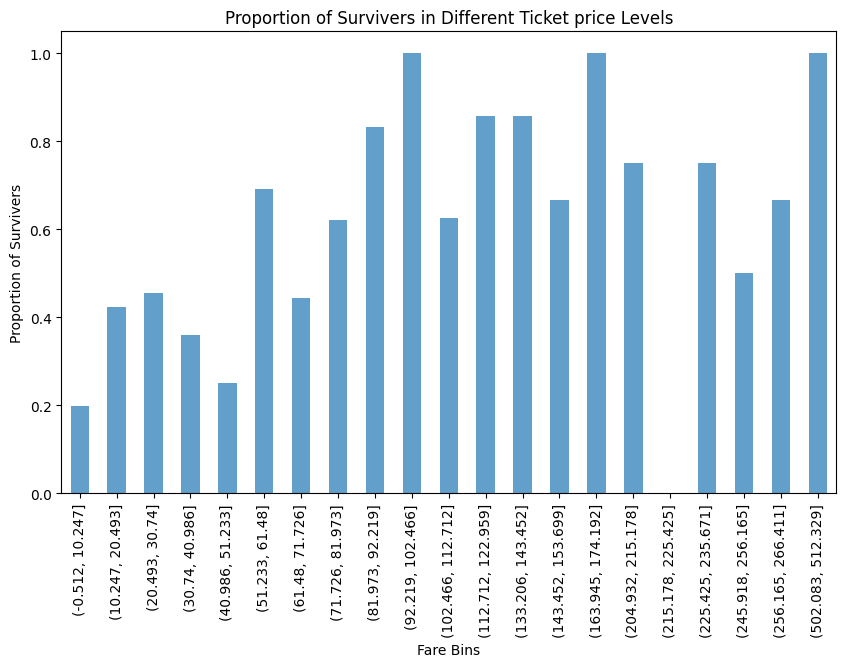

Proportion of old people survived: 0.4034090909090909
Proportion of young people survived: 0.4088397790055249


In [5]:
import matplotlib.pyplot as plt

women_survived = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]
total_women = data[data['Sex'] == 'female'].shape[0]
proportion_women_survived = women_survived / total_women

men_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]
total_men = data[data['Sex'] == 'male'].shape[0]
proportion_men_survived = men_survived / total_men

# Display the proportions
print(f'Proportion of women survived: {proportion_women_survived}')
print(f'Proportion of men survived: {proportion_men_survived}')

median_fare = data['Fare'].median()
high_fare = data[data['Fare'] > median_fare]
low_fare = data[data['Fare'] <= median_fare]

high_fare_survived = high_fare[high_fare['Survived'] == 1].shape[0]
total_high_fare = high_fare.shape[0]
proportion_high_fare_survived = high_fare_survived / total_high_fare

# Calculate the proportion of pet owners in the low-income group
low_fare_survived = low_fare[low_fare['Survived'] == 1].shape[0]
total_low_fare = low_fare.shape[0]
proportion_low_fare_survived = low_fare_survived / total_low_fare

# Display the proportions
print(f'Proportion of high-ticket price people survived: {proportion_high_fare_survived}')
print(f'Proportion of low-ticket price people survived: {proportion_low_fare_survived}')



fare_bins = pd.cut(data['Fare'], bins=50)  

survivers = data[data['Survived'] == 1]
total_counts = data.groupby(fare_bins, observed=True).size()
surviver_counts = survivers.groupby(fare_bins, observed=True).size()
proportions = surviver_counts / total_counts

# Plot the proportions
plt.figure(figsize=(10, 6))
proportions.plot(kind='bar', alpha=0.7)
plt.xlabel('Fare Bins')
plt.ylabel('Proportion of Survivers')
plt.title('Proportion of Survivers in Different Ticket price Levels')
plt.show()

median_age = data['Age'].median()
old = data[data['Age'] > median_age]
young = data[data['Age'] <= median_age]

old_survived = old[old['Survived'] == 1].shape[0]
total_old = old.shape[0]
proportion_old_survived = old_survived / total_old

# Calculate the proportion of pet owners in the low-income group
young_survived = young[young['Survived'] == 1].shape[0]
total_young = young.shape[0]
proportion_young_survived = young_survived / total_young

# Display the proportions
print(f'Proportion of old people survived: {proportion_old_survived}')
print(f'Proportion of young people survived: {proportion_young_survived}')


**3.** Group the records by passenger class, and calculate the average age in each group. 
Is it true that this value is approximately the same across all classes?


In [7]:
def avg_age_by_class(data):
    class_groups = data.groupby('Pclass')
    for group_name, group in class_groups:
        average_age = np.nanmean(group['Age'])
        print(f'Passenger class: {group_name}, Average age: {average_age}')
    return

avg_age_by_class(data)

Passenger class: 1, Average age: 38.233440860215055
Passenger class: 2, Average age: 29.87763005780347
Passenger class: 3, Average age: 25.14061971830986


**4.** Find all the features with missing data. 
Typically, algorithms cannot handle such data by default. 
Suggest several methods for handling missing data and specify the advantages/disadvantages of each. 
Illustrate at least two of the suggested methods using this dataset as an example.

In [9]:
from sklearn.impute import KNNImputer

# Find columns with any NaN values
columns_with_nan = data.columns[data.isnull().any()]

# Display columns with NaN values
print("Columns with NaN values:", columns_with_nan)

# Make a copy of the dataset for each imputation method
data_mean_imputation = data.copy()
data_ffill_imputation = data.copy()
data_knn_imputation = data.copy()

# 1. Mean Imputation
data_mean_imputation['Age'].fillna(data['Age'].mean(), inplace=True)

# 2. Forward Fill Imputation
data_ffill_imputation['Age'].fillna(method='ffill', inplace=True)

# 3. KNN Imputation
# Select only numeric columns for imputation
numeric_cols = data_knn_imputation.select_dtypes(include=[np.number]).columns
non_numeric_cols = data_knn_imputation.select_dtypes(exclude=[np.number]).columns

# Apply KNN imputation only on numeric columns
imputer = KNNImputer(n_neighbors=5)
data_knn_imputation[numeric_cols] = imputer.fit_transform(data_knn_imputation[numeric_cols])

# Reintegrate non-numeric columns
data_knn_imputation[non_numeric_cols] = data[non_numeric_cols]

# Display the results
#print("Mean Imputation:\n", data_mean_imputation.head())
#print("\nForward Fill Imputation:\n", data_ffill_imputation.head())
#print("\nKNN Imputation:\n", data_knn_imputation.head())
print('*****Original data*****')
avg_age_by_class(data)
print('*****Ffill-imputed data*****')
avg_age_by_class(data_ffill_imputation)
print('*****Mean-imputed data*****')
avg_age_by_class(data_mean_imputation)
print('*****Knn-imputed data*****')
avg_age_by_class(data_knn_imputation)


Columns with NaN values: Index(['Age', 'Cabin', 'Embarked'], dtype='object')
*****Original data*****
Passenger class: 1, Average age: 38.233440860215055
Passenger class: 2, Average age: 29.87763005780347
Passenger class: 3, Average age: 25.14061971830986
*****Ffill-imputed data*****
Passenger class: 1, Average age: 36.86962962962963
Passenger class: 2, Average age: 29.607771739130435
Passenger class: 3, Average age: 26.365580448065174
*****Mean-imputed data*****
Passenger class: 1, Average age: 37.04811819172113
Passenger class: 2, Average age: 29.8669581202046
Passenger class: 3, Average age: 26.403258655804482
*****Knn-imputed data*****
Passenger class: 1.0, Average age: 37.18998148148148
Passenger class: 2.0, Average age: 29.95233695652174
Passenger class: 3.0, Average age: 26.300211812627296


/var/folders/_k/zqjfyj2s77n2ktn_5c75v1340000gn/T/ipykernel_24622/1605034843.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mean_imputation['Age'].fillna(data['Age'].mean(), inplace=True)
/var/folders/_k/zqjfyj2s77n2ktn_5c75v1340000gn/T/ipykernel_24622/1605034843.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

**5.** Display a histogram of the age distribution for each passenger class (use the data from the tasks involving pandas). 
As a result, you should obtain three histograms displayed side by side using the *plt.subplots* function. Each histogram should be normalized. 
Pay attention to the *figsize*, *sharey*, and *sharex* parameters of the *plt.subplots* function. The *bins* and *density* parameters of the *plt.hist* function may also be useful.


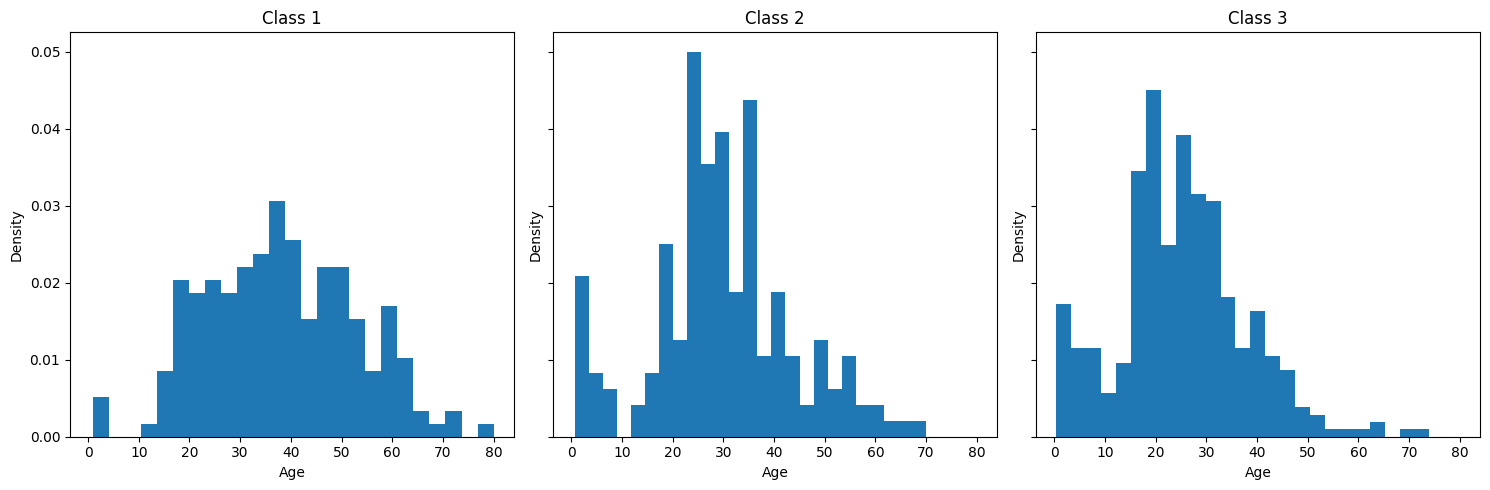

In [10]:
# Group the data by 'Pclass'
class_groups = data.groupby('Pclass')

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

# Plot histograms for each class
for (pclass, group), ax in zip(class_groups, axs):
    ax.hist(group['Age'].dropna(), bins=25, density=True)
    ax.set_title(f'Class {pclass}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()
